# Buy and Hold

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:

from config.constants import *
from backtesting import Backtest ,Strategy
from util.plot_equity import plot_equity_trades
from util.load_data import load_data
# from BuyAndHold import BuyAndHold
import pandas as pd
from util.Save_result_return import save_to_csv

## Get Data

In [3]:
XAUUSD = load_data()

In [4]:
XAUUSD['D1'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5043 entries, 2007-01-01 to 2023-03-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5043 non-null   float64
 1   High    5043 non-null   float64
 2   Low     5043 non-null   float64
 3   Close   5043 non-null   float64
 4   Volume  5043 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.4 KB


## Define Strategy

In [5]:
account_size = 10000

In [6]:
class BuyAndHold(Strategy):

    def init(self):
        pass

    def next(self):
        if not self.position:
            self.buy(size=1)

In [7]:
strategy = BuyAndHold

# Backtest each time frame

## TF D1

In [13]:
Backtest_D1 = Backtest(XAUUSD['D1'], strategy, cash=account_size, margin=1/200)
result_D1 = Backtest_D1.run()
result_D1

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                   99.960341
Equity Final [$]                    11192.399
Equity Peak [$]                     11430.149
Return [%]                           11.92399
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                    0.564501
Volatility (Ann.) [%]                1.931831
Sharpe Ratio                          0.29221
Sortino Ratio                        0.401314
Calmar Ratio                         0.074298
Max. Drawdown [%]                   -7.597829
Avg. Drawdown [%]                   -0.389217
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       79 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     186.595444
Worst Trade [%]                    186.595444
Avg. Trade [%]                    

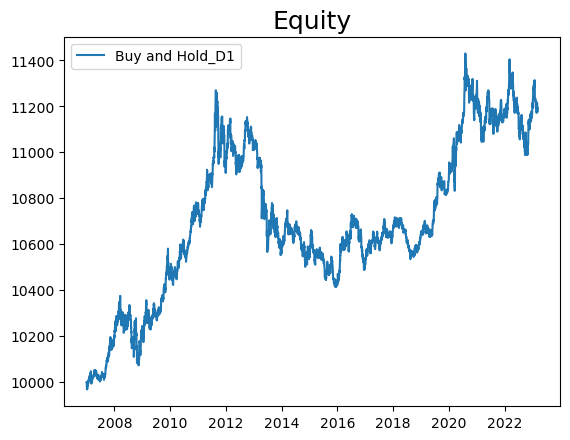

In [14]:
plot_equity_trades(result_D1['_equity_curve'], 'Buy and Hold_D1' , account_size)

### Save output

In [10]:
save_to_csv(result_D1, '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv')  

## TF H4

In [11]:
Backtest_H4 = Backtest(XAUUSD['H4'], strategy,
                       cash=account_size,  )
result_H4 = Backtest_H4.run()
result_H4

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                   99.992301
Equity Final [$]                    11227.205
Equity Peak [$]                     11433.398
Return [%]                           12.27205
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                    0.580024
Volatility (Ann.) [%]                1.932586
Sharpe Ratio                         0.300128
Sortino Ratio                        0.412472
Calmar Ratio                         0.076156
Max. Drawdown [%]                   -7.616281
Avg. Drawdown [%]                   -0.203731
Max. Drawdown Duration     3261 days 00:00:00
Avg. Drawdown Duration       31 days 19:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      193.02353
Worst Trade [%]                     193.02353
Avg. Trade [%]                    

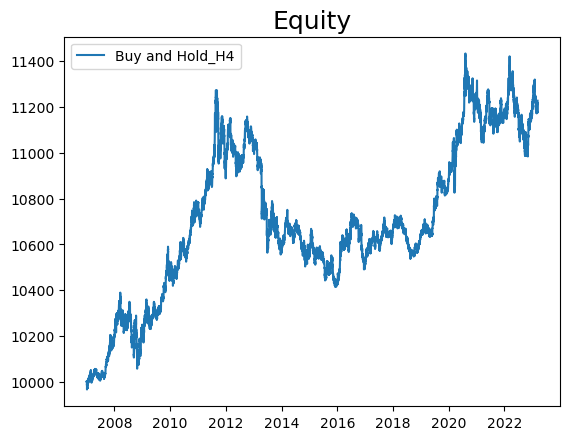

In [12]:
plot_equity_trades(result_H4['_equity_curve'], 'Buy and Hold_H4', account_size)

### Save output

In [13]:
save_to_csv(result_H4,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv')

## TF H1

In [14]:
Backtest_H1 = Backtest(XAUUSD['H1'], strategy,
                       cash=account_size,  )
result_H1 = Backtest_H1.run()
result_H1

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:00:00
Duration                   5912 days 17:00:00
Exposure Time [%]                   99.997958
Equity Final [$]                     11219.85
Equity Peak [$]                     11434.753
Return [%]                            12.1985
Buy & Hold Return [%]               193.27055
Return (Ann.) [%]                    0.576527
Volatility (Ann.) [%]                1.932003
Sharpe Ratio                         0.298409
Sortino Ratio                            0.41
Calmar Ratio                         0.074955
Max. Drawdown [%]                   -7.691636
Avg. Drawdown [%]                   -0.132501
Max. Drawdown Duration     3246 days 20:00:00
Avg. Drawdown Duration       16 days 20:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     191.988983
Worst Trade [%]                    191.988983
Avg. Trade [%]                    

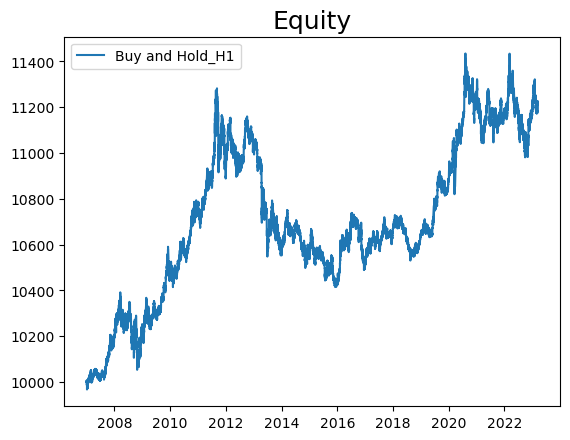

In [15]:
plot_equity_trades(result_H1['_equity_curve'], 'Buy and Hold_H1', account_size)

### Save output

In [16]:
save_to_csv(result_H1,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv')

## TF M30 

In [17]:
Backtest_M30 = Backtest(XAUUSD['M30'], strategy,
                       cash=account_size,  )
result_M30 = Backtest_M30.run()
result_M30

Start                     2007-01-01 00:00:00
End                       2023-03-10 17:30:00
Duration                   5912 days 17:30:00
Exposure Time [%]                   99.998976
Equity Final [$]                    11226.764
Equity Peak [$]                     11434.344
Return [%]                           12.26764
Buy & Hold Return [%]              193.338852
Return (Ann.) [%]                    0.579828
Volatility (Ann.) [%]                1.932555
Sharpe Ratio                         0.300032
Sortino Ratio                        0.412333
Calmar Ratio                         0.074981
Max. Drawdown [%]                   -7.732961
Avg. Drawdown [%]                   -0.108027
Max. Drawdown Duration     3246 days 19:30:00
Avg. Drawdown Duration       12 days 16:42:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     192.952953
Worst Trade [%]                    192.952953
Avg. Trade [%]                    

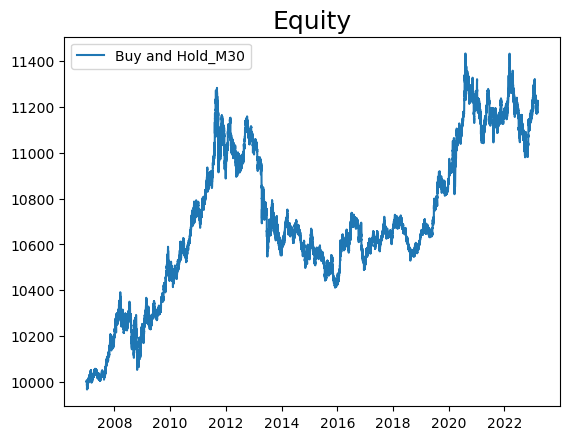

In [18]:
plot_equity_trades(result_M30['_equity_curve'],
                   'Buy and Hold_M30', account_size)

### Save output

In [19]:
save_to_csv(result_M30,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv')

## TF M15 

In [20]:
Backtest_M15 = Backtest(XAUUSD['M15'], strategy,
                       cash=account_size,  )
result_M15 = Backtest_M15.run()
result_M15

Start                     2014-09-23 13:00:00
End                       2023-03-10 17:45:00
Duration                   3090 days 04:45:00
Exposure Time [%]                      99.999
Equity Final [$]                     10637.46
Equity Peak [$]                     10843.354
Return [%]                             6.3746
Buy & Hold Return [%]               52.062773
Return (Ann.) [%]                     0.59837
Volatility (Ann.) [%]                1.924623
Sharpe Ratio                         0.310902
Sortino Ratio                        0.436397
Calmar Ratio                         0.143055
Max. Drawdown [%]                   -4.182802
Avg. Drawdown [%]                   -0.134565
Max. Drawdown Duration     1078 days 14:45:00
Avg. Drawdown Duration       13 days 06:04:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                      51.962301
Worst Trade [%]                     51.962301
Avg. Trade [%]                    

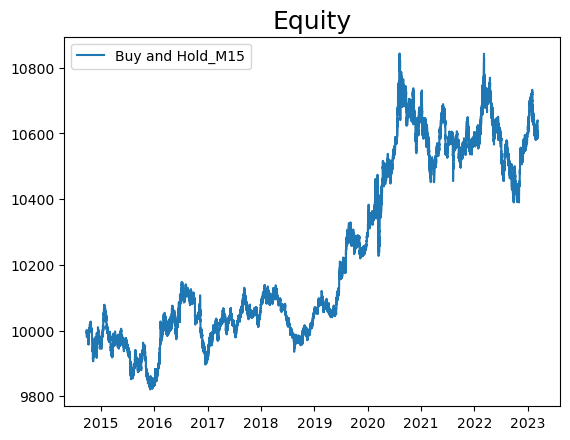

In [21]:
plot_equity_trades(result_M15['_equity_curve'],
                   'Buy and Hold_M15', account_size)

### Save output

In [22]:
save_to_csv(result_M15,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M15.csv')

## TF M5

In [23]:
Backtest_M5 = Backtest(XAUUSD['M5'], strategy,
                       cash=account_size,  )
result_M5 = Backtest_M5.run()
result_M5

Start                     2020-05-15 11:10:00
End                       2023-03-10 17:55:00
Duration                   1029 days 06:45:00
Exposure Time [%]                      99.999
Equity Final [$]                    10131.107
Equity Peak [$]                     10337.787
Return [%]                            1.31107
Buy & Hold Return [%]                7.487395
Return (Ann.) [%]                    0.352032
Volatility (Ann.) [%]                2.512555
Sharpe Ratio                         0.140109
Sortino Ratio                         0.18697
Calmar Ratio                          0.07988
Max. Drawdown [%]                   -4.407007
Avg. Drawdown [%]                   -0.082214
Max. Drawdown Duration      945 days 19:05:00
Avg. Drawdown Duration        7 days 02:17:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                       7.563016
Worst Trade [%]                      7.563016
Avg. Trade [%]                    

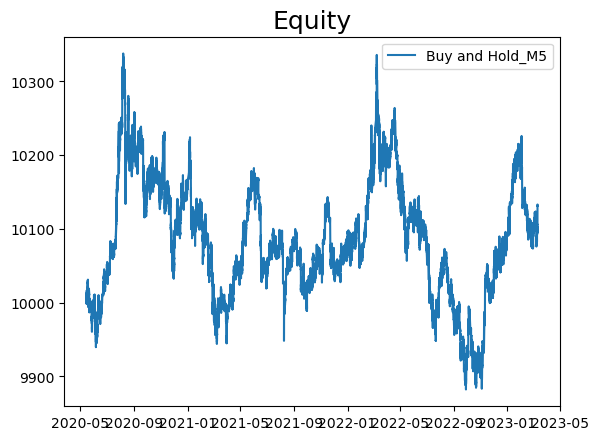

In [24]:
plot_equity_trades(result_M5['_equity_curve'], 'Buy and Hold_M5', account_size)

### Save output

In [25]:
save_to_csv(result_M5,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M5.csv')

## TF M1

In [26]:
Backtest_M1 = Backtest(XAUUSD['M1'], strategy,
                       cash=account_size,  )
result_M1 = Backtest_M1.run()
result_M1

Start                     2022-08-16 23:13:00
End                       2023-03-10 17:59:00
Duration                    205 days 18:46:00
Exposure Time [%]                      99.999
Equity Final [$]                     10088.37
Equity Peak [$]                     10183.767
Return [%]                             0.8837
Buy & Hold Return [%]                4.977319
Return (Ann.) [%]                    1.270608
Volatility (Ann.) [%]                2.434686
Sharpe Ratio                         0.521877
Sortino Ratio                        0.793363
Calmar Ratio                         0.761088
Max. Drawdown [%]                   -1.669462
Avg. Drawdown [%]                   -0.046827
Max. Drawdown Duration       90 days 01:47:00
Avg. Drawdown Duration        0 days 22:26:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                       4.976663
Worst Trade [%]                      4.976663
Avg. Trade [%]                    

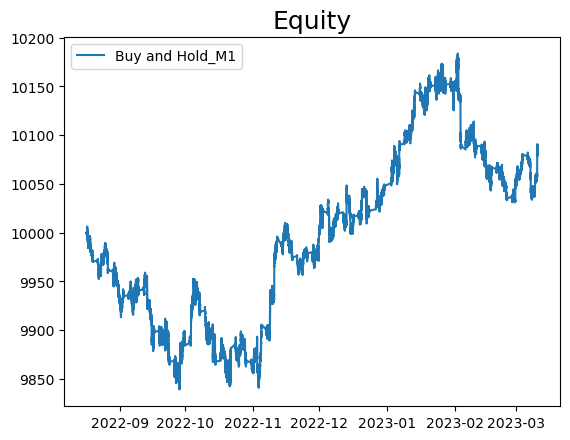

In [27]:
plot_equity_trades(result_M1['_equity_curve'], 'Buy and Hold_M1', account_size)

### Save output

In [28]:
save_to_csv(result_M1,'../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M1.csv')